# Battery State of Charge
State of Charge (SoC) refers to the amount of electric charge (usually measured in percentage) remaining in a battery compared to its full capacity. It is a crucial parameter for understanding the current energy level of a battery. SoC is dynamic and changes as a battery is charged or discharged. When a battery is fully charged, its SoC is 100%, and as it discharges, the SoC decreases. Conversely, as a battery is charged, the SoC increases.


In [1]:
import pandas as pd
import csv

with open("TripA01.csv", "r") as dataset:
    csv = csv.reader(dataset)
    
    # Get the header row
    header = next(dataset)
    
    # Get header datatype
    print(type(header))
    
    # Convert the header to a list and remove semicolons and new line character
    header_list = header.replace(';', ',').replace('\n', ',').split(',')
    
    # Print the header row
    print("Header:", header_list)
    
    rows = []
    
    for row in dataset:
         # Convert the header to a list and remove semicolons and new line character and append to rows list
        rows.append(row.replace(';', ',').replace('\n', ',').split(','))
        
#     convert rows and header to a pandas dataframe
    data_frame = pd.DataFrame(rows, columns=header_list)

    
# save dataframe to csv
data_frame.to_csv("battery_heating_data.csv", index=False)
print(data_frame.shape)
# display dataframe
data_frame




<class 'str'>
Header: ['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]', 'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'Heating Power LIN [W]', 'Requested Heating Power [W]', 'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]', 'Heater Current [A]', 'Ambient Temperature [°C]', 'Coolant Temperature Heatercore [°C]', 'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]', '']
(10090, 29)


,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Heater Signal,Heater Voltage [V],Heater Current [A],Ambient Temperature [°C],Coolant Temperature Heatercore [°C],Requested Coolant Temperature [°C],Coolant Temperature Inlet [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C],
0,0,0,574,0,0,-0.03,0,391.4,-2.2,21,...,1,0,0,25.5,0,0,0,30.5,24.5,
1,0.1,0,574,0,0,0,0,391.4,-2.21,21,...,1,0,0,25.5,0,0,0,30.5,24.5,
2,0.2,0,574,0,0,-0.01,0,391.4,-2.26,21,...,1,0,0,25.5,0,0,0,30.5,24.5,
3,0.3,0,574,0,0,-0.03,0,391.4,-2.3,21,...,1,0,0,25.5,0,0,0,30.5,24.5,
4,0.4,0,574,0,0,-0.03,0,391.4,-2.3,21,...,1,0,0,25.5,0,0,0,30.5,24.5,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10085,1008.5,20.71,565,25.06,-9.4,-0.28,0,387.91,-3.12,22,...,1,0,0,33,0,0,0,5,22.67,
10086,1008.6,20.6,565,23.57,-8.9,-0.24,0,387.96,-2.37,22,...,1,0,0,33,0,0,0,5,22.67,
10087,1008.7,20.44,565,22.55,-12.4,-0.31,0,388.01,-1.62,22,...,1,0,0,33,0,0,0,5,22.67,
10088,1008.8,20.3,565,22.55,-15.2,-0.4,0,388.06,-0.92,22,...,1,0,0,33,0,0,0,5,22.67,


In [2]:
# describe 'soc' values
import pandas as pd
battery_heating_data = pd.read_csv("battery_heating_data.csv")
print(battery_heating_data.shape)
battery_heating_data['SoC [%]'].describe()

(10090, 29)


count    10090.000000
mean        84.307435
std          1.560409
min         81.500000
25%         82.900000
50%         84.500000
75%         85.700000
max         86.900000
Name: SoC [%], dtype: float64

In [3]:
# drop the last column since it contains NAN
battery_heating_data = battery_heating_data.drop(battery_heating_data.columns[-1], axis=1)
print(battery_heating_data.shape)
battery_heating_data

(10090, 28)


,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,AirCon Power [kW],Heater Signal,Heater Voltage [V],Heater Current [A],Ambient Temperature [°C],Coolant Temperature Heatercore [°C],Requested Coolant Temperature [°C],Coolant Temperature Inlet [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
0,0.0,0.00,574.0,0.00,0.0,-0.03,0.0,391.40,-2.20,21.0,...,0.40,1,0,0,25.5,0,0,0,30.5,24.50
1,0.1,0.00,574.0,0.00,0.0,0.00,0.0,391.40,-2.21,21.0,...,0.40,1,0,0,25.5,0,0,0,30.5,24.50
2,0.2,0.00,574.0,0.00,0.0,-0.01,0.0,391.40,-2.26,21.0,...,0.40,1,0,0,25.5,0,0,0,30.5,24.50
3,0.3,0.00,574.0,0.00,0.0,-0.03,0.0,391.40,-2.30,21.0,...,0.40,1,0,0,25.5,0,0,0,30.5,24.50
4,0.4,0.00,574.0,0.00,0.0,-0.03,0.0,391.40,-2.30,21.0,...,0.40,1,0,0,25.5,0,0,0,30.5,24.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10085,1008.5,20.71,565.0,25.06,-9.4,-0.28,0.0,387.91,-3.12,22.0,...,1.92,1,0,0,33.0,0,0,0,5.0,22.67
10086,1008.6,20.60,565.0,23.57,-8.9,-0.24,0.0,387.96,-2.37,22.0,...,1.92,1,0,0,33.0,0,0,0,5.0,22.67
10087,1008.7,20.44,565.0,22.55,-12.4,-0.31,0.0,388.01,-1.62,22.0,...,1.92,1,0,0,33.0,0,0,0,5.0,22.67
10088,1008.8,20.30,565.0,22.55,-15.2,-0.40,0.0,388.06,-0.92,22.0,...,1.92,1,0,0,33.0,0,0,0,5.0,22.67


In [4]:
# rows_with_nan = battery_heating_data[battery_heating_data.isna().any(axis=1)]
# rows_with_nan

In [5]:
# generate X dataset
X = battery_heating_data.drop('SoC [%]', axis=1)
X.shape

(10090, 27)

In [6]:
# genrate y dataset
y = battery_heating_data[['SoC [%]'] ]
y.shape

(10090, 1)

In [7]:
# split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 117)

In [ ]:
# build model using lazy predict
from lazypredict.Supervised import LazyRegressor

#Initialize and run LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Print the list of models and their performance metrics
models


 71%|███████████████████████████████████████████████████████████████████▊                           | 30/42 [01:00<00:17,  1.47s/it]

In [8]:
# build the model using extra trees regressor since it gave the best performance from lazy predict
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math

# Create and train the ExtraTreesRegressor model
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# compute the rmse value and r-square value
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Mean Squared Error: {mse}, R-Squared: {r_squared}, RMSE: {rmse}")


C:\Users\adewa\AppData\Local\Temp\ipykernel_20936\2759811382.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Mean Squared Error: 2.032596134790866e-05, R-Squared: 0.999991357213117, RMSE: 0.004508432249453092


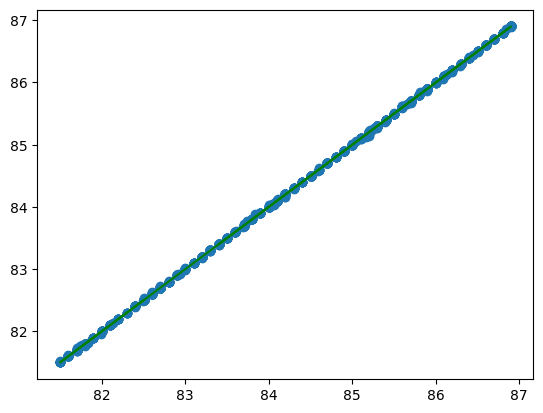

In [9]:
# visualize result by creating a scatter plot
# Fit a line to the data using numpy.polyfit
import numpy as np
coeffs = np.polyfit(y_test.values.flatten(), y_pred, 1)
fit_func = np.poly1d(coeffs)

plt.scatter(y_test.values, y_pred)

# Add the fit line to the plot
plt.plot(y_test, fit_func(y_test), 'g')

# Save the plot to a file
plt.savefig('soh_model_scatter_plot.png')

In [17]:
# serialize model
import pickle

pickle.dump(model, open('soh_model.pkl', 'wb'))